# Project 2 : Reacher Project (Continuous Control)

## Project Report 

This is the report for the second project in the Udacity Deep Reinforcement Learning Nanodegree. The purpose of this project is to let us learn to use policy-based deep reinforcement learning algorithm to train an agent/agents. In this environment, a double-jointed arm can move to target locations. A reward of +0.1 is provided for each step that the agent's hand is in the goal location. Thus, **the goal of the agent is to maintain its position at the target location for as many time steps as possible.**



I choose to solve this project by DDPG algorithm. I am using the code for DDPG from https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulum as a starting point.

I refer to https://github.com/tlan95/Udacity-DRL-nanodegree-project2-Continuous-Control for the methods to refine the DDPG algorithm hyperparameters. 

The codes for fine-tuning the hyperparameters and agent training are in **'Continuous_Control.ipynb'**. In that notebook, we run seveveral combinations of hypter parameters for 100 episodes and see their performanced. Then the agent is trained with one set of hyperparameters. The final result show that the agent is ablt to obtain average score of 30 over 100 episodes. 

In the report, we will see the performance of the trained model.To do so, we will load agent with pretrained parameters and let the agent play with the environment. We then will check the average score of playing 100 episode. 

## Environment details

The environment is based on [Unity ML-agents](https://github.com/Unity-Technologies/ml-agents). The project environment provided by Udacity is similar to the [Reacher](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Learning-Environment-Examples.md#reacher) environment on the Unity ML-Agents GitHub page.

The observation space consists of 33 variables corresponding to position, rotation, velocity, and angular velocities of the arm. Each action is a vector with four numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between -1 and 1.


### Code implementation

The code for this project is built upon the example from https://github.com/udacity/deep-reinforcement-learning/tree/master/ddpg-pendulum. The codes include:

- 'Continuous_Control.ipynb': main code for fine-tuning and training the model;

- 'ddpg_agent.py': contains the class for DDPG agent and class for replay buffer. The construnction of these two classes are very similar to DQN. The major difference is that the the DDPG agent acts according to the actor_local network, and the actor_local network is updated alongside the critic_local network when the 'learn()' method is called, while in the DQN, the agent acts according the Q_network and only Q_network is updated. 

- 'model.py' : contains the neural network for the actor network and critic network. One batch normalization layer is added after the first linear layer in both the actor and critic networks. 


### DDPG parameters and results

#### Methodology

I refer to the method in https://github.com/tlan95/Udacity-DRL-nanodegree-project2-Continuous-Control to refine the DDPG algorithm hyperparameters. One inspiration from this method is that the hyper parameters are identified and can be  directly modified when calling the "ddpg" function. 
The set of hyper parameters of the DDPG algorithm copied from the Udacity DRL includes:
```
max_t=1000, # maximum allowed time step in each episode
random_seed=2,
update_every=1,# time steps before neural network update from minibatch
actor_fc1_units=400, # number of neurons in first layer in actor network
actor_fc2_units=300, # number of neurons in second layer in actor network
critic_fcs1_units=400, # number of neurons in first layer in critic network
critic_fc2_units=300, # number of neurons in second layer in critic network

gamma=0.99,  #discount rate
tau=1e-3,    #soft update rate

lr_actor=1e-4,  # actor network learning rate
lr_critic=1e-3, # critic network learning rate
weight_decay=0, # neural network weight decay rate

mu=0.,  # Ornstein-Uhlenbeck noise parameter
theta=0.15, # Ornstein-Uhlenbeck noise parameter
sigma=0.2 # Ornstein-Uhlenbeck noise parameter
```
The following hyper parameters have been changed:

- It has been found that max_t should be set to 1000 because Unity Environment will only consider the game "done" after 1000 time steps.
- actor_fc1_units,actor_fc2_units,critic_fcs1_units,critic_fc2_units. Using smaller neural network can help the agent train better and faster;
- lr_actor and lr_critic. Learning rate can be tweaked to achieve better results;
- sigma. sigma can be reduced to achieve better training result. 
- update_every defines after how many time steps the actor and critic network are updated. Using a value larger than 1 can help reduce training time and episodes.

As shown in the notebook, after tweaking around 7 sets of hyperparameters, I settle down on a final set of hyperparameters: 
```
max_t=1000, 
update_every=4, 
actor_fc1_units=200, 
actor_fc2_units=150,
critic_fcs1_units=200, 
critic_fc2_units=150,
gamma=0.99, 
tau=1e-3,
lr_actor=5e-4, 
lr_critic=5e-4, 
weight_decay=0,
mu=0.,  
theta=0.15,  
sigma=0.1 
```
The scores during training is plot below. It can be observed it takes about 500 episodes to train the agent to obtain an average score over 30.
![title](imag/1agent_training.png)


We will use the trained agent to play a game for 100 episodes, and shows that it can achieve average score of 30 over 100 episodes. 

In [1]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
from collections import deque
import numpy as np
from unityagents import UnityEnvironment

In [2]:
env = UnityEnvironment(file_name="Reacher.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

In [4]:
# load the weights from file
def let_agent_play():
    agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
    agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
    max_t=1000
    play_episodes=100
    play_scores = []                        # list containing scores from each episode
    play_scores_window = deque(maxlen=100)  # last 100 scores
    for i_episode in range(1, play_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations     
        agent.reset()
        score = np.zeros(1)
        for t in range(max_t):
            actions = agent.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            score += rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):
                break 
        play_scores_window.append(np.mean(score))       # save most recent score
        play_scores.append(np.mean(score))              # save most recent score
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(play_scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(play_scores_window)))
    return play_scores

In [5]:
# plot the scores
def plot_dqn(scores):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(scores)), scores)
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    plt.show()

Episode 100	Average Score: 35.80


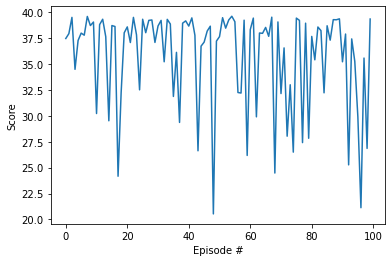

In [6]:
from ddpg_agent import Agent
agent = Agent(state_size=33, action_size=4, random_seed=2,update_every=4,\
         actor_fc1_units=200, actor_fc2_units=150,\
         critic_fcs1_units=200, critic_fc2_units=150,\
         gamma=0.99, tau=1e-3,lr_actor=5e-4, lr_critic=5e-4, weight_decay=0,\
         mu=0., theta=0.15, sigma=0.1)
play_scores=let_agent_play()
plot_dqn(play_scores)

### Observation of the 20 agent version
As you may notice, the code in **'Continuous_Control.ipynb'** is generalized for both single-agent and multi-agent. The same notebook and accompanying **"ddpg_agent.py" "model.py"** have been used to train the 20-agent version as well. The parameter for 20agent is the same with 1 single agent version, except that update_every=20. 
The training result is shown below. Compared to the single agent version, the performance of the 20agent training is more efficient-requring less episodes to train.
![title](imag/20agent_training.png)

My observation of the 20agent version is that in fact we are only using one agent, but we can interact with 20 copies of environments at the same time. During the trainig, after playing with parallel environments for a certain(20 in this case) time-steps, the agent learns from 20 minibatch consecutively. The improvement of training speed is because we can collect experiences in parallel, reducing correlations among experiences. 

### Ideas for future work

As discussed in the Udacity instructions, the next step is to solve the second version and adopt algorithms like PPO, A3C, and D4PG that use multiple (non-interacting, parallel) copies of the same agent to distribute the task of gathering experience.

In [7]:
env.close()